### Project: Apple Share Price Prediction
Aims: predict the next 10 days (2 weeks) share price based on the last 5 years data

Features used: 
- Close Price 
- Open Price
- High Price
- Low Price
- Volume, IXIC (NASDAQ Index)
- GSPC (S&P 500 Index)
- VIX (Volatility Index)
- DX-Y.NYB (US Dollor Index)
- TNX (US Treasury Yield)
- SOX (PHLX Semiconductor Index)

Note: Only using the closed prices for all other index


### Model A1: Feed-Forward Neural Network (MLP) with PyTorch (in this file)

### Model A2: Feed-Forward Neural Network (MLP) with TensorFlow and Karas (not in this file)

### Model B: LSTM/Sequence Model (not in this file)

### Model C: Transformer Model (not in this file)


In [1]:
import yfinance as yf
apple = yf.Ticker("AAPL")
apple_data = apple.history(period = "5y")
tickers = [ "^IXIC", "^GSPC", "DJI", "^VIX", "DX-Y.NYB", "^TNX", "^SOX"]
others_data = yf.download(tickers, period = "5y")["Close"] # Only using the Close Prices for all indexes



/var/folders/kw/xjs_s57d66dc3cnb0p3gwv180000gn/T/ipykernel_28544/644798645.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  others_data = yf.download(tickers, period = "5y")["Close"] # Only using the Close Prices for all indexes
[*********************100%***********************]  7 of 7 completed


In [2]:
apple_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-14 00:00:00-05:00,119.345220,120.075309,118.313363,118.546989,79184500,0.0,0.0
2020-12-15 00:00:00-05:00,121.039047,124.504542,120.834623,124.485069,157243700,0.0,0.0
2020-12-16 00:00:00-05:00,124.027571,124.962077,123.200131,124.416946,98208600,0.0,0.0
2020-12-17 00:00:00-05:00,125.478005,126.139960,124.640835,125.283318,94359800,0.0,0.0
2020-12-18 00:00:00-05:00,125.536429,125.672712,122.771820,123.297485,192541500,0.0,0.0


In [3]:
apple_data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-12-05 00:00:00-05:00,280.540009,281.140015,278.049988,278.779999,47265800,0.0,0.0
2025-12-08 00:00:00-05:00,278.130005,279.670013,276.149994,277.890015,38211800,0.0,0.0
2025-12-09 00:00:00-05:00,278.160004,280.029999,276.920013,277.179993,32193300,0.0,0.0
2025-12-10 00:00:00-05:00,277.750000,279.750000,276.440002,278.779999,33038300,0.0,0.0
2025-12-11 00:00:00-05:00,279.100006,279.589996,273.809998,278.029999,33207600,0.0,0.0


In [4]:
len(apple_data)

1255

In [5]:
others_data.head()

Ticker,DJI,DX-Y.NYB,^GSPC,^IXIC,^SOX,^TNX,^VIX
Date,,,,,,,
2020-12-11,NaN,NaN,NaN,NaN,NaN,0.893,NaN
2020-12-14,NaN,90.709999,3647.489990,12440.040039,2736.250000,0.892,24.719999
2020-12-15,30199.300781,90.470001,3694.620117,12595.059570,2774.790039,0.923,22.889999
2020-12-16,30154.500000,90.449997,3701.169922,12658.190430,2773.419922,0.920,22.500000
2020-12-17,30303.400391,89.820000,3722.479980,12764.750000,2778.139893,0.930,21.930000


In [6]:
others_data.tail()

Ticker,DJI,DX-Y.NYB,^GSPC,^IXIC,^SOX,^TNX,^VIX
Date,,,,,,,
2025-12-08,NaN,99.089996,6846.509766,23545.900391,7375.220215,4.172,16.66
2025-12-09,NaN,99.220001,6840.509766,23576.490234,7372.509766,4.186,16.93
2025-12-10,NaN,98.790001,6886.680176,23654.150391,7467.490234,4.164,15.77
2025-12-11,NaN,98.349998,6901.000000,23593.859375,7411.479980,4.141,14.85
2025-12-12,NaN,98.416000,NaN,NaN,NaN,NaN,15.19


### Filling the missing value with previous available values


In [7]:
apple_data = apple_data.ffill()

# Checking if there is any missing value in apple_data
apple_data.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [8]:
others_data.ffill()
others_data.isna().sum()

# Note too many missing values in DJI, dropping the DJI column

Ticker
DJI         967
DX-Y.NYB      1
^GSPC         4
^IXIC         4
^SOX          4
^TNX          3
^VIX          3
dtype: int64

In [9]:
others_data.drop(columns = ['DJI'], inplace = True)


In [10]:
others_data.isna().sum()

Ticker
DX-Y.NYB    1
^GSPC       4
^IXIC       4
^SOX        4
^TNX        3
^VIX        3
dtype: int64

In [11]:
others_data.bfill()

Ticker,DX-Y.NYB,^GSPC,^IXIC,^SOX,^TNX,^VIX
Date,,,,,,
2020-12-11,90.709999,3647.489990,12440.040039,2736.250000,0.893,24.719999
2020-12-14,90.709999,3647.489990,12440.040039,2736.250000,0.892,24.719999
2020-12-15,90.470001,3694.620117,12595.059570,2774.790039,0.923,22.889999
2020-12-16,90.449997,3701.169922,12658.190430,2773.419922,0.920,22.500000
2020-12-17,89.820000,3722.479980,12764.750000,2778.139893,0.930,21.930000
...,...,...,...,...,...,...
2025-12-08,99.089996,6846.509766,23545.900391,7375.220215,4.172,16.660000
2025-12-09,99.220001,6840.509766,23576.490234,7372.509766,4.186,16.930000
2025-12-10,98.790001,6886.680176,23654.150391,7467.490234,4.164,15.770000


In [12]:
others_data.isna().sum()


Ticker
DX-Y.NYB    1
^GSPC       4
^IXIC       4
^SOX        4
^TNX        3
^VIX        3
dtype: int64

In [13]:
others_data = others_data.dropna()

In [292]:
others_data.isna().sum()

Ticker
DX-Y.NYB    0
^GSPC       0
^IXIC       0
^SOX        0
^TNX        0
^VIX        0
dtype: int64

In [15]:
len(others_data)

1255

In [16]:
print(apple_data.index.tz)  
print(others_data.index.tz)

# Comment: apple_data times are timezone-awared while others_data times are timezone-naive (no timezone)

America/New_York
None


In [17]:
# Convert the times in apple_data to timezone-naive

apple_data.index = apple_data.index.tz_localize(None)

In [18]:
full_df = apple_data.join(others_data, how = "inner")
full_df.drop(columns = ["Dividends", "Stock Splits"], inplace = True)

In [19]:
len(full_df)

1255

In [20]:
full_df.tail(10)

,Open,High,Low,Close,Volume,DX-Y.NYB,^GSPC,^IXIC,^SOX,^TNX,^VIX
Date,,,,,,,,,,,
2025-11-28,277.260010,279.000000,275.989990,278.850006,20135600,99.459999,6849.089844,23365.689453,7025.149902,4.017,16.35
2025-12-01,278.010010,283.420013,276.140015,283.100006,46587700,99.410004,6812.629883,23275.919922,7020.529785,4.096,17.24
2025-12-02,283.000000,287.399994,282.630005,286.190002,53669500,99.360001,6829.370117,23413.669922,7149.470215,4.086,16.59
2025-12-03,286.200012,288.619995,283.299988,284.149994,43538700,98.849998,6849.720215,23454.089844,7280.509766,4.057,16.08
2025-12-04,284.100006,284.730011,278.589996,280.700012,43989100,98.989998,6857.120117,23505.140625,7215.970215,4.108,15.78
2025-12-05,280.540009,281.140015,278.049988,278.779999,47265800,98.989998,6870.399902,23578.130859,7294.839844,4.139,15.41
2025-12-08,278.130005,279.670013,276.149994,277.890015,38211800,99.089996,6846.509766,23545.900391,7375.220215,4.172,16.66
2025-12-09,278.160004,280.029999,276.920013,277.179993,32193300,99.220001,6840.509766,23576.490234,7372.509766,4.186,16.93
2025-12-10,277.750000,279.750000,276.440002,278.779999,33038300,98.790001,6886.680176,23654.150391,7467.490234,4.164,15.77


In [21]:
y = full_df["Close"]
X = full_df.drop(columns = ["Close"])

### Preprocess the data

Putting 30 days of data into 1 row as X ('Open', 'High', 'Low', 'Volume', 'DX-Y.NYB', '^GSPC', '^IXIC', '^SOX', '^TNX', '^VIX'), the next 10 days data ("Close") as y

In [22]:
import numpy as np

# Need create an overlapping window for X (30 days) to predict y (10 days)
# Reshape the whole dataset such that X = [[day1],[day2],....,[day30]], [day2,....,day31], y = [day31,....,day40], [day32,...,day41]

# Window 1 (t = 0 → 4):
# X₀ = [100, 102, 101, 103, 104]
# y₀ = next 10 days

# Window 2 (t = 1 → 5):
# X₁ = [102, 101, 103, 104, 106]
# y₁ = next 10 days

window_x = 30
window_y = 10

X = []
y = []

cols = ['Open', 'High', 'Low', 'Volume', 'DX-Y.NYB', '^GSPC', '^IXIC', '^SOX', '^TNX', '^VIX']

# range(30,3200) creates a range object starting from 30,31,32,......3199

# full_df[col].iloc[i-window:i].values return list of arrays wirh each row treated as an array

for i in range(window_x, len(full_df) - window_y + 1):
    X.append(full_df[cols].iloc[i-window_x : i].values)
    y.append(full_df[["Close"]].iloc[i:i + window_y].values)

X = np.array(X)

y = np.array(y)


In [23]:
num_samples = X.shape[0] #1206 rows
window_x = X.shape[1] # 30 days of data in 1 row
num_features = X.shape[2] # 10 features per day

# Flatten X,now there are 1206 rows, with each row having 300 values (10 features * 30 days)
X = X.reshape(num_samples, window_x * num_features)


# Flatten y
y = y.reshape(y.shape[0], y.shape[1])

In [24]:
X.shape

(1216, 300)

In [25]:
y.shape

(1216, 10)

### Scale the data

### MLP: Standard Scaler, inputs centered at around 0 to prevent gradient explodes or vanishes
Gradient vanishing means during backpropagation the gradients become extremely small as they move backward thru the network, resuiting in model learning very slow or not learning at all.

Gradient explosion means that the gradient become extremely large, they model jumps around instead of learning gradually.

### LSTM: MinMaxScaler
### Transformer: MinMaxScaler
LSTM and Transformer contain sigmoid and softmax, which break when values arenot bounded.

There will be some extreme values after standard scaling, e.g. -3, -5, -7

LSTM input gate: sigmoid, sigmoid(x) = 1 / (1 + exp(-x))

LSTM forget gate: sigmoid

LSTM output gate: sigmoid

LSTM candidate state: tanh, tanh(x) = (exp(x) - exp(-x)) / (exp(x) + exp(-x))

Transformer self-attention: Attention = softmax(QKᵀ / sqrt(d))

### Model A1 - Feed-Forward Neural Network (MLP) with PyTorch

### Split the training and test datasets

In [26]:
# Note: Decided not to use validation set, just to check the total loss of the traininf or test data
train_size = int(len(X) * 0.8)

X_train = X[:train_size]
X_test  = X[train_size:]

y_train = y[:train_size]
y_test  = y[train_size:]

### Scale the data 

In [27]:
# Need to scale the training and test data seperately such that there is no correlation between the training and testing data
# Scale X
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()

scaler_X.fit(X_train) # fit() learns the statistic from your training data, i.e. means and SDs

scaled_X_train_mlp = scaler_X.transform(X_train) # transform() used the learned statistics to apply the scaling

scaled_X_test_mlp  = scaler_X.transform(X_test) # It uses the learned means and SDs to scale the test data

# Scale y

scaler_y = StandardScaler()

scaler_y.fit(y_train) 

scaled_y_train_mlp = scaler_y.transform(y_train)

scaled_y_test_mlp = scaler_y.transform(y_test)

### Transfrom the training and testing datasets (both X and y) into tensors (must do before passing them into the model)

In [28]:
import torch
# torch.tensor() is equivalent to tf.convert_to_tensor()
# For NNs, you must convert to float32

X_train_tensor = torch.tensor(scaled_X_train_mlp, dtype = torch.float32)
X_test_tensor = torch.tensor(scaled_X_test_mlp, dtype = torch.float32)

y_train_tensor = torch.tensor(scaled_y_train_mlp, dtype = torch.float32)
y_test_tensor = torch.tensor(scaled_y_test_mlp, dtype = torch.float32)


### Create Datasets and and load train_dataset and test_dataset into train_loader and test_loader

In [29]:
from torch.utils.data import TensorDataset, DataLoader

# TensorDataset = PyTorch's way of storing the data safely, you cannot feed the entire dataset at once.
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset  = TensorDataset(X_test_tensor,  y_test_tensor)

# A DataLoader handles batching, shuffling, parallel loading, memory-efficient iteration
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = False) # Time-series data should not be shuffled
test_loader  = DataLoader(test_dataset,  batch_size = 32, shuffle = False)

### Model A1: MLP with PyTorch

1) Input passes through layers.

2) Each layer computes weighted sums.

3) Activation transforms output.

4) Final layer produces prediction.

5) Loss measures prediction error, criterion = nn.MSELoss().

6) Backpropagation computes gradients.

- After a forwad pass, we get a prediction (y^), the true value (y), the loss (how wrong the prediction was), but the model does not know which weights caused the error, and how to fix those weights.

- A gradient tells us "if I change the weight slightly, how will the loss change"

- Positive gradient -> weight makes loss larger -> reduce this weight

- Negative gradient -> weight makes loss smaller -> increase this weight

- Zero gradient -> weight does not matter -> no change

- Back propagation used chain rule to compute how much each earlier weight contributed to the final error.

- d(Loss)/d(weight) = d(Loss)/d(output) * d(output)/d(weight)

- The left side d(Loss)/d(weight) -> "If I change this weight a little bit, how much will the loss change", it is the gradient of a weight

- The right side d(Loss)/d(output) * d(output)/d(weight), Effect of weight on loss = (effect of output on loss) * (effect of weight on output)

- if you have multiple layer;

  Layer 1:

  z1 = w1*x + b1

  a1 = activation(z1)

  Layer 2:

  z2 = w2*a1 + b2

  a2 = activation(z2)

  Layer 3:

  z3 = w3*a2 + b3

  ŷ = z3

  dLoss/dw1 = dLoss/dŷ * dŷ/dz3 * dz3/da2 * da2/dz2 * dz2/da1 * da1/dz1 * dz1/dw1


7) Optimizer updates weights.
-Processes of updating weights with 1 batch (size = 32)
7.1) Compute predictions, [ŷ1, ŷ2, ŷ3, ..., ŷ32]
7.2) Compute loss, Loss = (loss1 + loss2 + loss3 + ...... + loss32)/32
7.3) Back propagation
7.4) Update weights -> then batch 2, do it all over again

8) Repeat for all batches. 

- If your batch size is 32, and you have 3200 samples, you have 100 batches and update the weights 100 times in 1 epoch. 
- If there is 4 left, the the loader just passes 4 samples in.

9) Repeat for many epochs.



MLP Model: 3 Layers + 2 Activation Functions

1) Input goes into linear layer, output = (input x weights) + bias, initial weights are small random values, btwn -0.1 to +0.1

2) Output goes into ReLU

3) Output goes into next linear layer

4) Output goes into ReLU

5) Output goes into final linear layer (no activation for regression)

ReLU(x) = max(0, x)

GELU(x) = x * Φ(x), where Φ(x) is the CDF of the standard normal distribution.

Use ReLU for simple models (MLP, CNN), small datasets, low-compute environments

Use GELU for better performance in modern nns, transformaers, deep architecture, large-scale training

In [30]:
import torch.nn as nn

# Note: using class MLP(nn.Module) is a standard practice in PyTorch.

# You are creating a custom model that inherits from PyTorch’s base class nn.Module. 

# Every PyTorch model must inherit from nn.Module. 

# A little bit differnt from using class in Python.

class MLP(nn.Module): 
    def __init__(self, input_dim): # input_dim = number of input features per sample
        super().__init__() # super().__init__(): A standard practice, required for the model to work properly
        self.net = nn.Sequential(nn.Linear(input_dim, 128), # Input layer, 64 neurons
                                nn.GELU(), 
                                nn.Linear(128, 128),
                                nn.GELU(),
                                nn.Linear(128, 10) # 10 outputs
                                )

    # forward() is a standard practice in PyTorch, even thouh you don't write it in TensorFlow

    # forward() literally means: Take input X -> apply Linear, GELU -> Linear -> GELU -> Linear -> return prediction
    
    # Keras Sequential models already define the forward pass internally.

    def forward(self, x):
        return self.net(x)

# X_train_tensor.shape[1] give you the number of features (columns) in X
model = MLP(input_dim = X_train_tensor.shape[1]) 


### Choose a loss function
Loss funtion = the teacher telling the model how wrong it is

Use MSE when: outliers matter, want fast convergence in deep learning. Best for NNs, Stock/price prediction, forcasting tasks

Use MAE when datasets are noisy, data with outliers

Use RMSE when you want error in the same units as the target (e.g. dollors, temperature), human-readable number

In practice, use MSE for training loss, RMSE, MAE for evaluation metric

In [31]:
criterion = nn.MSELoss()

Adam (industry default)

SGD (sometimes best generalization)

AdamW (with weight decay)

RMSprop (RL tasks)


In [32]:
optimizer = torch.optim.AdamW(model.parameters(), lr = 0.001, weight_decay = 0.0001) # lr = learning rate

# model.parameters() returns all weights and bias so the optimizer updates these during training


In [33]:
# 1 epoch = 1 full pass thru the entire dataset, the model needs many epoach to gradually update weights
num_epochs = 50



In [34]:
for epoch in range(num_epochs): #range(20) gives you a range object starting from 0-19, iterable

    model.train() # Set the model into training mode

    total_loss = 0 # Track the total_loss for the whole epoch

    for X_batch, y_batch in train_loader:

        optimizer.zero_grad() # Setting the gradients back to 0, gradients arte temporary values that tell the optimizer how to update weights

        predictions = model(X_batch) # Forwad pass with using forward(), returns the predictions

        loss = criterion(predictions, y_batch) # Compute the loss using loss function MSE

        loss.backward() # Backprop -> to compute gradients of all weights (how much each weight contributed to the error and how much each weight should be updated)

        optimizer.step() # Update each weight based on the gradients

        total_loss += loss.item() # Add the batch loss to the total loss
    
    print(f"Epoch {epoch + 1}/{num_epochs}, Total Loss: {total_loss:.4f}")

# total_loss = total error for the entire training dataset in that epoch

# What we wanted to capture here is whether the total loss is reducing after each epoch

# The loss jumps imply 1) the stock data is noisy, 2) high learning rate, 3) batch size too large or small, 
# 4) GELU is more sensitive than ReLU, 5) model too simple (add more hidden layers and neurons)

# Ideally the total loss should decrease steadily.

Epoch 1/50, Total Loss: 10.6170
Epoch 2/50, Total Loss: 17.9636
Epoch 3/50, Total Loss: 9.6237
Epoch 4/50, Total Loss: 9.0121
Epoch 5/50, Total Loss: 15.1312
Epoch 6/50, Total Loss: 8.6716
Epoch 7/50, Total Loss: 8.4319
Epoch 8/50, Total Loss: 9.0415
Epoch 9/50, Total Loss: 9.0972
Epoch 10/50, Total Loss: 12.5321
Epoch 11/50, Total Loss: 32.5023
Epoch 12/50, Total Loss: 6.9351
Epoch 13/50, Total Loss: 11.6801
Epoch 14/50, Total Loss: 25.0409
Epoch 15/50, Total Loss: 7.2584
Epoch 16/50, Total Loss: 6.1867
Epoch 17/50, Total Loss: 5.8174
Epoch 18/50, Total Loss: 4.4016
Epoch 19/50, Total Loss: 5.2395
Epoch 20/50, Total Loss: 5.1086
Epoch 21/50, Total Loss: 2.5490
Epoch 22/50, Total Loss: 5.0289
Epoch 23/50, Total Loss: 10.2999
Epoch 24/50, Total Loss: 12.0479
Epoch 25/50, Total Loss: 21.3131
Epoch 26/50, Total Loss: 4.5869
Epoch 27/50, Total Loss: 7.0458
Epoch 28/50, Total Loss: 11.8248
Epoch 29/50, Total Loss: 6.7065
Epoch 30/50, Total Loss: 15.5134
Epoch 31/50, Total Loss: 3.8878
Epoch

In [35]:
y_pred_list = []

model.eval()

test_loss = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        preds = model(X_batch)
        loss = criterion(preds, y_batch) # y_batch is y_test
        test_loss += loss.item()

print(f"Total Test Loss: {test_loss:.4f}")

# Epoch 50/50, Loss: 5.3232
# Total Test Loss: 3.6000
# Model is not overfitting, test set might be easier, dropout, batch also increase total loss in training, training set has more outliers

Total Test Loss: 3.6651


### Use the lastest 40 rows to test the model, 30 days to predict the nearest 10 days "Close" price

In [36]:
trial_df = full_df.iloc[-40:]

In [37]:
len(trial_df)

40

In [38]:
cols = ['Open', 'High', 'Low', 'Volume', 'DX-Y.NYB', '^GSPC', '^IXIC', '^SOX', '^TNX', '^VIX']
X_trial = trial_df[cols].iloc[:30].values
y_true = trial_df["Close"].iloc[30:40]

In [39]:
print(len(X_trial))


30


In [40]:
print(len(y_true))

10


### Normalise X and y for the trial data (only have 30 days of data)

In [41]:
# Note: Don't fit the trial data again, we fit that with training data already

num_samples = 1
window_x = 30 # 30 days of data in 1 row
num_features = X_trial.shape[1] # 10 features per day

X_trial = X_trial.reshape(num_samples, window_x * num_features)

X_trial_scaled = scaler_X.transform(X_trial)


### Convert X_trial.scaled to tensor

In [42]:
X_trial_tensor = torch.tensor(X_trial_scaled, dtype = torch.float32)

### Predict y (latest 10-day Close prices)

In [43]:

model.eval()
with torch.no_grad():
    y_pred_scaled = model(X_trial_tensor).numpy()



In [44]:
y_pred_scaled


array([[4.2389746, 4.1714435, 4.197682 , 4.1946235, 4.2612257, 4.316111 ,
        4.2644167, 4.381723 , 4.1569695, 4.284787 ]], dtype=float32)

In [45]:
y_pred_real = scaler_y.inverse_transform(y_pred_scaled)


In [46]:
y_pred_real

array([[291.16672, 289.66998, 290.9404 , 291.33112, 293.82486, 295.9736 ,
        294.97113, 299.09332, 292.7933 , 297.18878]], dtype=float32)

In [47]:
y_true.head()

# the date is the index in this Series

Date
2025-11-28    278.850006
2025-12-01    283.100006
2025-12-02    286.190002
2025-12-03    284.149994
2025-12-04    280.700012
Name: Close, dtype: float64

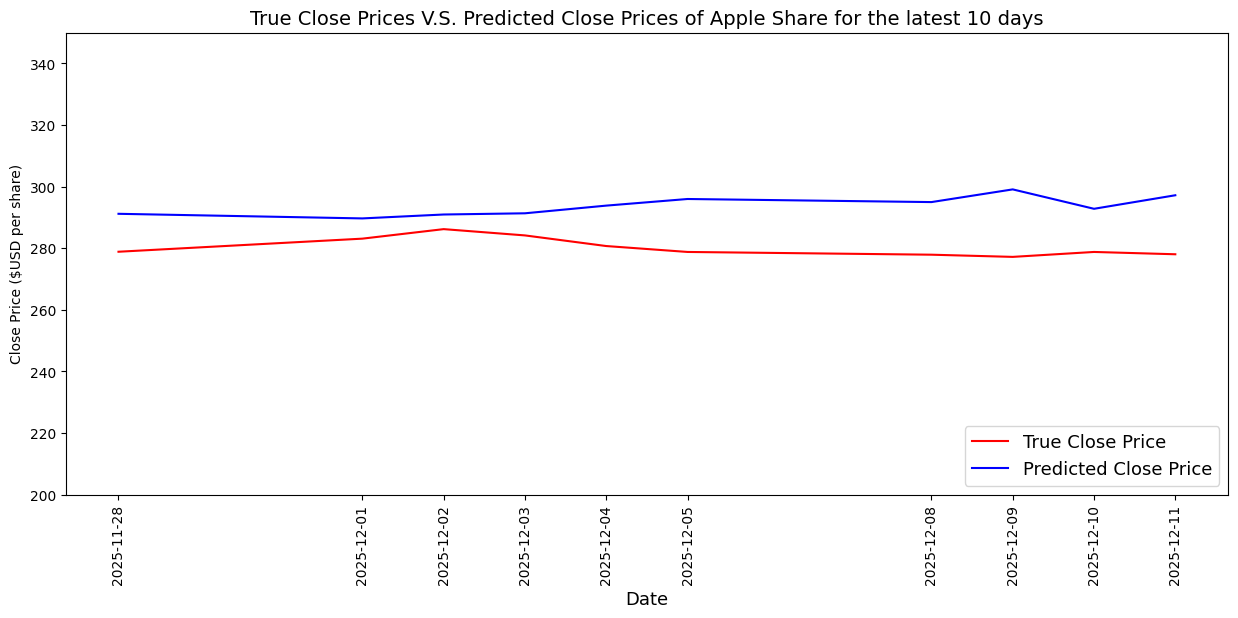

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 6))

plt.plot(y_true.index.ravel(), y_true.values.ravel(), color = "red", label = "True Close Price")
plt.plot(y_true.index.ravel(), y_pred_real.ravel(), color = "blue", label = "Predicted Close Price")

# Force ticks to use all index values
plt.gca().set_xticks(y_true.index)
plt.gca().set_xticklabels(y_true.index.strftime("%Y-%m-%d"), rotation = 90)

plt.title("True Close Prices V.S. Predicted Close Prices of Apple Share for the latest 10 days", fontsize = 14)
plt.xlabel("Date", fontsize = 13)
plt.legend(loc = "lower right", fontsize = 13)

plt.ylim(200,350)
plt.ylabel("Close Price ($USD per share)")
plt.show()



In [49]:
# Average daily error
total_errors = abs(y_true.values.ravel() - y_pred_real.ravel())
average_error = sum(total_errors)/10
print(f"The Average Daily Prediction Error for the latest 10 days is $USD {average_error:.2f}.")

The Average Daily Prediction Error for the latest 10 days is $USD 13.33.


#### Strategies to find the best hyperparameters for PyTorch Model

Note: Usually, the practical workflow would be finding the best hyperparameters and then build the model
1) Grid Search - try all combinations

2) Random Search - Try random combinations, faster and often better than grid search
    
3) Use Optuna - use smart search (Tree-Structured Parzen Estimator) to find good hyperparameters much faster than grid or random search (it works in TensorFlow as well)

    TPE (Tree-structured Parzen Estimator) -> Bayesian Optimization

    Bayesian Optimization is a method for finding good hyperparameters without trying every combination.
    Steps: Try some hyperparameters, build a probability model of "Which hyperparameters are likely to be good", use that model to choose the next hyperparameters, update the model after each trial 
    - if a trial with learning rate = 0.001 gives good results, Optuna explores around 0.001 more and avoids bad ranges like 0.1 or 1e-7.

    - Optuna might miss some good hyperparameter configs but the hyperparameter spaces are hugh so it doesn't matter much.



### Full Dynamic MLP Template

- All hyperparameters in this layout could be modified.

In [245]:
import torch
import torch.nn as nn

class FlexibleMLP(nn.Module):
    def __init__(self, input_dim, hidden_layers, activations , dropouts, output_dim):
        super().__init__()
        self.activations = activations
        layers = []
        prev_dim = input_dim
        
        # A dict to provide all ativation fuctions
        act_map = {"relu": nn.ReLU(),
                    "gelu": nn.GELU(),
                    "tanh": nn.Tanh(),
                    "sigmoid": nn.Sigmoid(),
                    "elu": nn.ELU()}

        # zip() requires the the all lists to be the same length, otherwise it will stop at the shorter length.

        # End the model building prematurely if the lengths are not the same.

        if not(len(hidden_layers) == len(activations) == len(dropouts)):
            raise ValueError("hidden_layers, activations, dropouts must have the same length")

        # Hidden layers

        for h, act_fun, dropout_rate in zip(hidden_layers, activations, dropouts):
            layers.append(nn.Linear(prev_dim, h)) # prev_dim initially = input_dim
            layers.append(act_map[act_fun])

            if dropout_rate > 0:
                layers.append(nn.Dropout(dropout_rate)) # add dropout rate if there is any
            
            # Keep track of the previous dimension to know the output dimension, and it becomes the input dimension of the next layer
            prev_dim = h

        # Output layer
        layers.append(nn.Linear(prev_dim, output_dim))

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)


# model = FlexibleMLP(
#     input_dim = 300,
#     hidden_layers = [256, 128, 64],
#     activations=["relu", "gelu", "tanh"],
#     dropouts = [0.1, 0.3, 0.0],   # different dropout for each layer
#     output_dim = 10
# )

### Find the best hyperparameters (learning rate, batch size, number of nuerons, number of hidden layers)

- Dropout rate: 0.1, 0.2, 0.3, 0.4, 0.5 (Use the same dropout rate for all layer, but you can tune that with using for loop in Optuna)
- Learning rate: 1e-0.5, 1e-0.4, 1e-0.3, 1e-02
- Number of layer: 1, 2, 3, 4
- Number of neuron in each layer: 512, 256, 128, 64, 32. 

    Each layer must have the number of neurons less than or equal to that of previous layer.

    Note: Optuna might give you the best number of neurons = 166, you can try the value closest to the value of power of 2, e.g. in this case, it should be 128.

- Batch size: 32, 64



In [246]:
def objective(trial):

    # 1. Number of hidden layers
    num_layers = trial.suggest_int("num_layers", 1, 4)

    # Allowed sizes (fixed list — Optuna requires this)
    possible_units = [512, 256, 128, 64, 32]

    hidden_layers_sizes = []
    prev_units = 512  # start large so first layer has no restriction

    # 2. Select layer sizes with funnel structure
    for i in range(num_layers):
            units = trial.suggest_int(
            name=f"layer_{i}_units",
            low = 16, 
            high=prev_units, 
            log = True 
            )
        
            hidden_layers_sizes.append(units)
            prev_units = units


    # 3. Other hyperparameters
    learning_rate = trial.suggest_categorical("lr", [1e-5, 1e-4, 1e-3, 1e-2])
    dropout = trial.suggest_categorical("dropout", [0.1, 0.2, 0.3, 0.4, 0.5]) # Note: you could tune the dropout for each layer, similar to the layer sizes with using for loop
    batch_size = trial.suggest_categorical("batch_size", [32, 64])

    # 4. Build model
    model = build_model(
        hidden_units = hidden_layers_sizes,
        dropouts = dropout
    )

    # 5. Train model
    train_model(model, learning_rate, batch_size)

    # 6. Validation loss
    val_loss = evaluate(model)

    return val_loss

    

In [247]:
input_dim = scaled_X_train_mlp.shape[1]
output_dim = scaled_y_train_mlp.shape[1]

def build_model(hidden_units, dropouts): # hidden_units is a list containing the numbers of neurons for each layer

    model = FlexibleMLP(input_dim = input_dim,             
                        hidden_layers = hidden_units,
                        activations = ["gelu"]*len(hidden_units), 
                        dropouts = [dropouts]*len(hidden_units),     
                        output_dim = output_dim)

    return model

In [248]:
scaled_X_train_mlp = torch.tensor(scaled_X_train_mlp, dtype = torch.float32)
scaled_y_train_mlp = torch.tensor(scaled_y_train_mlp, dtype = torch.float32)

/var/folders/kw/xjs_s57d66dc3cnb0p3gwv180000gn/T/ipykernel_28544/720624721.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  scaled_X_train_mlp = torch.tensor(scaled_X_train_mlp, dtype = torch.float32)
/var/folders/kw/xjs_s57d66dc3cnb0p3gwv180000gn/T/ipykernel_28544/720624721.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  scaled_y_train_mlp = torch.tensor(scaled_y_train_mlp, dtype = torch.float32)


In [249]:
def train_model(model, lr, batch_size):

    criterion = nn.MSELoss()              
    optimizer = torch.optim.Adam(model.parameters(), lr = lr)

    train_dataset = TensorDataset(scaled_X_train_mlp, scaled_y_train_mlp)
    train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = False)

    model.train()
    for epoch in range(5):  
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            preds = model(X_batch.float())
            loss = criterion(preds, y_batch.float())
            loss.backward()
            optimizer.step()

In [250]:
def evaluate(model):
    model.eval()
    criterion = torch.nn.MSELoss()

    with torch.no_grad():
        y_pred = model(scaled_X_train_mlp)
        loss = criterion(y_pred, scaled_y_train_mlp)

    return float(loss.item())

In [251]:
import optuna
# study is an Optuna study obect, it stores all trials, hyperparameters, validation loss in each trial, and best trial found so far
study = optuna.create_study(direction = "minimize") 


[I 2025-12-12 22:15:56,108] A new study created in memory with name: no-name-120f3ca0-8595-4740-842b-d074b80b327d


In [252]:
# Try 100 different models
study.optimize(objective, n_trials = 100)

# Note: Optuna report the average loss per sample

[I 2025-12-12 22:15:56,165] Trial 0 finished with value: 0.6743342876434326 and parameters: {'num_layers': 4, 'layer_0_units': 23, 'layer_1_units': 17, 'layer_2_units': 16, 'layer_3_units': 16, 'lr': 0.01, 'dropout': 0.3, 'batch_size': 64}. Best is trial 0 with value: 0.6743342876434326.
[I 2025-12-12 22:15:56,213] Trial 1 finished with value: 0.4450318515300751 and parameters: {'num_layers': 1, 'layer_0_units': 320, 'lr': 0.001, 'dropout': 0.2, 'batch_size': 64}. Best is trial 1 with value: 0.4450318515300751.
[I 2025-12-12 22:15:56,250] Trial 2 finished with value: 0.2274692803621292 and parameters: {'num_layers': 3, 'layer_0_units': 47, 'layer_1_units': 29, 'layer_2_units': 20, 'lr': 0.001, 'dropout': 0.2, 'batch_size': 64}. Best is trial 2 with value: 0.2274692803621292.
[I 2025-12-12 22:15:56,318] Trial 3 finished with value: 0.7252328991889954 and parameters: {'num_layers': 3, 'layer_0_units': 50, 'layer_1_units': 45, 'layer_2_units': 20, 'lr': 0.0001, 'dropout': 0.2, 'batch_size

In [253]:
print("Best hyperparameters:", study.best_params)
print("Best total loss:", round(study.best_value, 4))

Best hyperparameters: {'num_layers': 2, 'layer_0_units': 69, 'layer_1_units': 37, 'lr': 0.001, 'dropout': 0.2, 'batch_size': 64}
Best total loss: 0.1101


In [254]:
# Extract the numbers neurons for each layer
num_neurons_ls = []
for i in range(study.best_params["num_layers"]):
    num_neurons_ls.append(study.best_params[f"layer_{i}_units"])


In [255]:
# A list to contain the number of neurons for each layer to build the best_model
num_neurons_ls


[69, 37]

In [256]:
# Build the best model, and the most effcient model

best_model = build_model(hidden_units = num_neurons_ls, dropouts = study.best_params['dropout'])

efficient_model = build_model(hidden_units = [512,256], dropouts = study.best_params['dropout'])

In [257]:
criterion = nn.MSELoss()


In [258]:
optimizer_best = torch.optim.AdamW(best_model.parameters(), lr = study.best_params["lr"], weight_decay = 0.0001)
optimizer_efficient = torch.optim.AdamW(efficient_model.parameters(), lr = study.best_params["lr"], weight_decay = 0.0001)

In [259]:
train_dataset = TensorDataset(scaled_X_train_mlp, scaled_y_train_mlp)
train_loader  = DataLoader(train_dataset, batch_size = study.best_params["batch_size"], shuffle = False)

In [260]:
num_epochs = 50

best_model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        preds = best_model(X_batch)
        loss = criterion(preds, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs} Loss: {total_loss:.4f}")



Epoch 1/50 Loss: 20.2695
Epoch 2/50 Loss: 20.2924
Epoch 3/50 Loss: 20.2897
Epoch 4/50 Loss: 20.2631
Epoch 5/50 Loss: 20.3140
Epoch 6/50 Loss: 20.2641
Epoch 7/50 Loss: 20.3151
Epoch 8/50 Loss: 20.3016
Epoch 9/50 Loss: 20.2957
Epoch 10/50 Loss: 20.3692
Epoch 11/50 Loss: 20.2812
Epoch 12/50 Loss: 20.3742
Epoch 13/50 Loss: 20.3601
Epoch 14/50 Loss: 20.3447
Epoch 15/50 Loss: 20.3090
Epoch 16/50 Loss: 20.3521
Epoch 17/50 Loss: 20.3373
Epoch 18/50 Loss: 20.3034
Epoch 19/50 Loss: 20.3000
Epoch 20/50 Loss: 20.3082
Epoch 21/50 Loss: 20.3383
Epoch 22/50 Loss: 20.2961
Epoch 23/50 Loss: 20.2571
Epoch 24/50 Loss: 20.3149
Epoch 25/50 Loss: 20.3016
Epoch 26/50 Loss: 20.3342
Epoch 27/50 Loss: 20.3431
Epoch 28/50 Loss: 20.3095
Epoch 29/50 Loss: 20.2986
Epoch 30/50 Loss: 20.3014
Epoch 31/50 Loss: 20.3085
Epoch 32/50 Loss: 20.3318
Epoch 33/50 Loss: 20.2894
Epoch 34/50 Loss: 20.3199
Epoch 35/50 Loss: 20.3006
Epoch 36/50 Loss: 20.3353
Epoch 37/50 Loss: 20.3118
Epoch 38/50 Loss: 20.3045
Epoch 39/50 Loss: 20.

In [261]:
best_model.eval()

test_loss = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        preds = best_model(X_batch)
        loss = criterion(preds, y_batch) # y_batch is y_test
        test_loss += loss.item()

print(f"Total Test Loss (Best Model): {test_loss:.4f}")

# Comment: Model is over-fitting, the solutions are: 1) increase droput rate, 2) reduce the number of neurons/ number of hidden layer, 
# 3)early stopping, stop traing when the test/validation loss starts to increase, 4) use L2 weight decay (AdamW)



Total Test Loss (Best Model): 44.2862


In [262]:
num_epochs = 50

efficient_model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        preds = efficient_model(X_batch)
        loss = criterion(preds, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs} Loss: {total_loss:.4f}")

Epoch 1/50 Loss: 19.8220
Epoch 2/50 Loss: 19.8714
Epoch 3/50 Loss: 19.8711
Epoch 4/50 Loss: 19.8708
Epoch 5/50 Loss: 19.8517
Epoch 6/50 Loss: 19.8840
Epoch 7/50 Loss: 19.8051
Epoch 8/50 Loss: 19.9269
Epoch 9/50 Loss: 19.8766
Epoch 10/50 Loss: 19.8994
Epoch 11/50 Loss: 19.8916
Epoch 12/50 Loss: 19.7866
Epoch 13/50 Loss: 19.9378
Epoch 14/50 Loss: 19.9302
Epoch 15/50 Loss: 19.9131
Epoch 16/50 Loss: 19.9113
Epoch 17/50 Loss: 19.8470
Epoch 18/50 Loss: 19.9164
Epoch 19/50 Loss: 19.8486
Epoch 20/50 Loss: 19.7899
Epoch 21/50 Loss: 19.9884
Epoch 22/50 Loss: 19.8847
Epoch 23/50 Loss: 19.8034
Epoch 24/50 Loss: 19.8743
Epoch 25/50 Loss: 19.8181
Epoch 26/50 Loss: 19.9785
Epoch 27/50 Loss: 19.9472
Epoch 28/50 Loss: 19.8705
Epoch 29/50 Loss: 19.9288
Epoch 30/50 Loss: 19.7910
Epoch 31/50 Loss: 19.9748
Epoch 32/50 Loss: 19.9692
Epoch 33/50 Loss: 19.7542
Epoch 34/50 Loss: 19.7793
Epoch 35/50 Loss: 19.8392
Epoch 36/50 Loss: 19.8800
Epoch 37/50 Loss: 19.9317
Epoch 38/50 Loss: 19.9078
Epoch 39/50 Loss: 19.

In [263]:
efficient_model.eval()

test_loss = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        preds = efficient_model(X_batch)
        loss = criterion(preds, y_batch) # y_batch is y_test
        test_loss += loss.item()

print(f"Total Test Loss (Efficient Model): {test_loss:.4f}")

Total Test Loss (Efficient Model): 42.5964


In [264]:
cols = ['Open', 'High', 'Low', 'Volume', 'DX-Y.NYB', '^GSPC', '^IXIC', '^SOX', '^TNX', '^VIX']
trial_df = full_df.iloc[-40:]
X_trial = trial_df[cols].iloc[:30].values
y_true = trial_df["Close"].iloc[30:40]

In [265]:
num_samples = 1
window_x = 30 # 30 days of data in 1 row
num_features = X_trial.shape[1] # 10 features per day

X_trial = X_trial.reshape(num_samples, window_x * num_features)

X_trial_scaled = scaler_X.transform(X_trial)

X_trial_tensor = torch.tensor(X_trial_scaled, dtype = torch.float32)



In [266]:
best_model.eval()
with torch.no_grad():
    y_pred_scaled = best_model(X_trial_tensor).numpy()

y_pred_real_best = scaler_y.inverse_transform(y_pred_scaled)


In [267]:
efficient_model.eval()
with torch.no_grad():
    y_pred_scaled = efficient_model(X_trial_tensor).numpy()

y_pred_real_efficient = scaler_y.inverse_transform(y_pred_scaled)

In [268]:
y_pred_real_best

array([[165.50075, 167.17982, 168.28827, 168.38658, 165.40205, 174.06873,
        163.60632, 173.08708, 157.57698, 155.65251]], dtype=float32)

In [269]:
y_pred_real_efficient

array([[178.82547, 178.75934, 154.38937, 169.84018, 172.96368, 164.73743,
        157.95331, 154.22156, 167.13594, 176.73161]], dtype=float32)

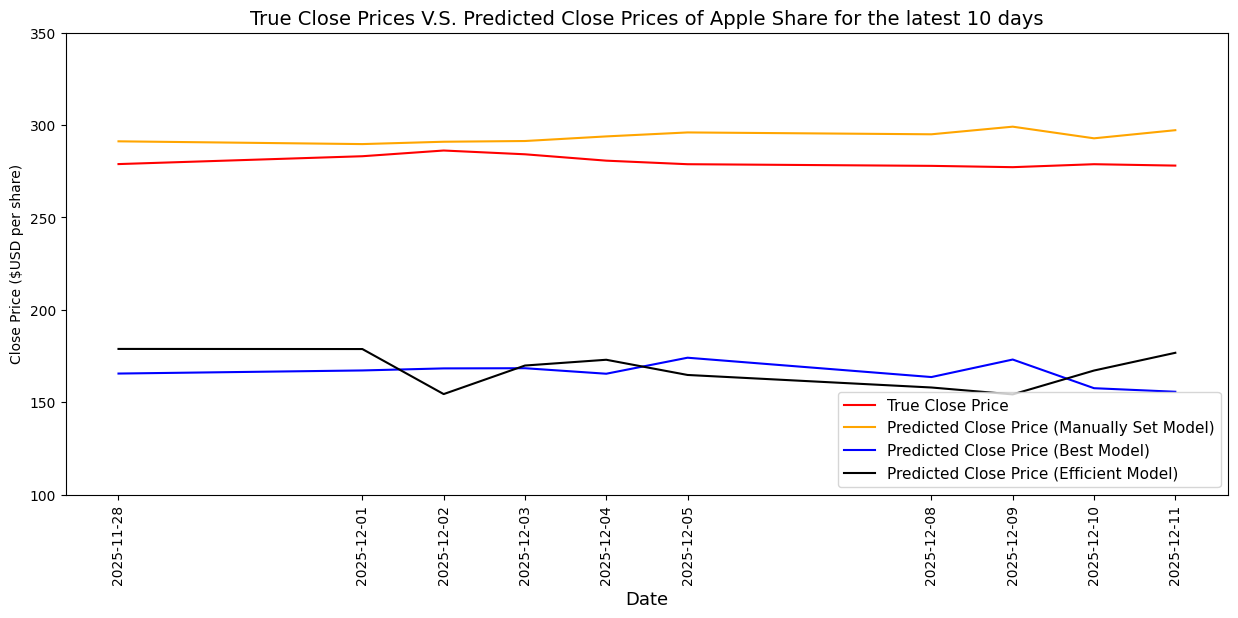

In [270]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 6))

plt.plot(y_true.index.ravel(), y_true.values.ravel(), color = "red", label = "True Close Price")
plt.plot(y_true.index.ravel(), y_pred_real.ravel(), color = "orange", label = "Predicted Close Price (Manually Set Model)")
plt.plot(y_true.index.ravel(), y_pred_real_best.ravel(), color = "blue", label = "Predicted Close Price (Best Model)")
plt.plot(y_true.index.ravel(), y_pred_real_efficient.ravel(), color = "black", label = "Predicted Close Price (Efficient Model)")


# Force ticks to use all index values
plt.gca().set_xticks(y_true.index)
plt.gca().set_xticklabels(y_true.index.strftime("%Y-%m-%d"), rotation = 90)

plt.title("True Close Prices V.S. Predicted Close Prices of Apple Share for the latest 10 days", fontsize = 14)
plt.xlabel("Date", fontsize = 13)
plt.legend(loc = "lower right", fontsize = 11)

plt.ylim(100,350)
plt.ylabel("Close Price ($USD per share)")
plt.show()

In [272]:
# Average daily error
total_errors_best = abs(y_true.values.ravel() - y_pred_real_best.ravel())
average_error_best = sum(total_errors_best)/10
print(f"The Average Daily Prediction Error (Best) for the latest 10 days is $USD {average_error_best:.2f}.")

total_errors_efficient = abs(y_true.values.ravel() - y_pred_real_efficient.ravel())
average_error_efficent = sum(total_errors_efficient)/10
print(f"The Average Daily Prediction Error (Efficeint) for the latest 10 days is $USD {average_error_efficent:.2f}.")

# Comment: Optuna does not gurantee to give you the best model, still need many trials and judgements.
# Comment: Also, MLP are fundamentally designed to process tabular data where each input is independent from each other.

The Average Daily Prediction Error (Best) for the latest 10 days is $USD 114.49.
The Average Daily Prediction Error (Efficeint) for the latest 10 days is $USD 112.81.


### Save the Best Model

In [284]:
checkpoint = {"state_dict": model.state_dict(),
            "hyperparams": {"input_dim": X_train_tensor.shape[1],
                            "hidden_units": num_neurons_ls,
                            "dropout": [study.best_params['dropout']]*len(num_neurons_ls),
                            "activations" : best_model.activations,
                            "lr": study.best_params['lr'],
                            "output_dim": y_train_tensor.shape[1]
                            }}

torch.save(checkpoint, "mlp_torch_checkpoint.pth")

### Rebuild the best Model

In [285]:
# Define the device 
device = torch.device("cpu")

# Load the checkpoint dictionary
checkpoint = torch.load("mlp_torch_checkpoint.pth", map_location = device)

In [286]:
# Extract the saved hyperparameters
input_dim = checkpoint['hyperparams']['input_dim']
hidden_units = checkpoint['hyperparams']['hidden_units']
dropout = checkpoint['hyperparams']['dropout']
activations = checkpoint['hyperparams']['activations']
output_dim = checkpoint['hyperparams']['output_dim']

In [287]:
rebuilt_model = FlexibleMLP(
    input_dim = input_dim,
    hidden_layers = hidden_units,
    activations = activations,
    dropouts = dropout,   
    output_dim = output_dim
    )

In [290]:
rebuilt_model.eval()

with torch.no_grad():
    y_pred_scaled = rebuilt_model(X_trial_tensor).numpy()

y_pred_real_rebuilt = scaler_y.inverse_transform(y_pred_scaled)

In [291]:
y_pred_real_rebuilt 

array([[167.4919 , 171.5466 , 165.43614, 160.47652, 169.28635, 164.15633,
        167.13353, 167.44804, 168.212  , 157.31163]], dtype=float32)